# EDA on CA EnviroScan 4

4/8/22

David Tersegno

---

This is a general scan over the data included in the California Office of Environmental Health Hazard Assessment [EnviroScan 4.0 report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), released in 2021.

Giovanna [ ] and Marshall Cyrus are each looking over the CA EnviroScans 2 and 3.

# Import libraries

In [3]:
# general
import os
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# sklearn

# Import data

In [11]:
# list raw data files
data_folder = '../raw_data/'
raw_data_files = os.listdir(data_folder)
raw_data_files

['calenviroscreen-3.0-results-june-2018-update.csv',
 'calenviroscreen2-final-report.csv',
 'calenviroscreen40resultsdatadictionary_F_2021.xlsx']

In [26]:
#import the enviroscan 4 excel data
ca4_file_path = data_folder + raw_data_files[2]
dfca4 = pd.read_excel(ca4_file_path)

In [30]:
#The data takes a long time to read, but is only a few MB after being interpreted.
# consider saving a csv copy from the dataframe later.

In [27]:
#look at the top.
dfca4.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571


### Column list

In [28]:
dfca4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

The data includes 58 columns, mostly as numerical types.
The three that aren't numerical include locations `California County` and `Approximate Location`. The third `object` type is `CES 4.0 Percentile Range`. This gives a range of numbers that likely can be turned into a numerical. We'll deal with that as it comes.

---
---
# Column Detail

---
## 0 Census Tract

In [31]:
col = 'Census Tract'
dfca4[col].describe()

count    8.035000e+03
mean     6.054896e+09
std      2.652280e+07
min      6.001400e+09
25%      6.037265e+09
50%      6.059053e+09
75%      6.073016e+09
max      6.115041e+09
Name: Census Tract, dtype: float64

Text(0.5, 1.0, 'Census Tract histogram')

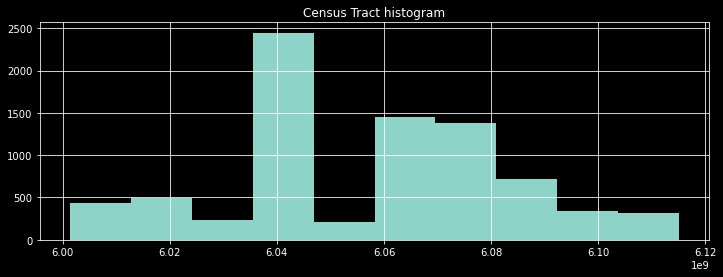

In [43]:
dfca4[col].hist( figsize = (12,4))
plt.title(col + ' histogram')

In [46]:
len(dfca4)

8035

In [47]:
len(dfca4[col].unique())

8035

The number of unique values is the same as the number of observations. Each has its own unique census identifier --- these may be used as indices for the data, but I will wait to see if there's any pattern.

### Q:
    - Do these census regions cover every portion of California?
    - How are they chosen? Are they approximately population organized?
    - Are these regions the same set as those in the other CAES data sets? Were there any changes to them from year to year?

---
##  1   Total Population 

Thanks to [the docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) for help with series.hist(). The `log` parameter is passed to `matplotlib.pyplot.hist()`.

In [48]:
col = 'Total Population'
dfca4[col].describe()

count     8035.000000
mean      4889.047542
std       2269.284396
min          0.000000
25%       3470.000000
50%       4615.000000
75%       5931.000000
max      38754.000000
Name: Total Population, dtype: float64

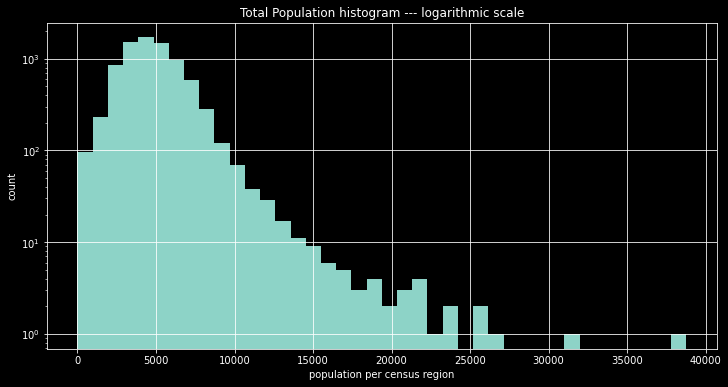

In [64]:
#distribution
dfca4[col].hist(bins=40, log = True, figsize = (12,6));
plt.title(col + ' histogram --- logarithmic scale');
plt.xlabel("population per census region");
plt.ylabel('count');

The population is skewed to higher values, with thousands of small populated areas and only a handful of very heavily populated ones.

None of these populations are "big city" levels, though. The very largest and sprawling areas must be broken into neighborhoods.

### Q:
    - What are the populations measuring? The census number may be a specifically designated region.

## 2 - California County

In [65]:
col = 'California County'
dfca4[col].describe()

count            8035
unique             58
top       Los Angeles
freq             2343
Name: California County, dtype: object

It looks like over a quarter of these regions come from Los Angeles county. It's a big one. There are 58 unique counties.

### Q:
    - is every portion of california's land represented here?
    - is every county represented?
    

## 3   ZIP 

In [75]:
col = 'ZIP'
dfca4[col].describe()

count     8035.000000
mean     92836.574611
std       3445.177594
min         32.000000
25%      91602.000000
50%      92691.000000
75%      94558.000000
max      96161.000000
Name: ZIP, dtype: float64

In [77]:
len(dfca4[col].unique())

1355

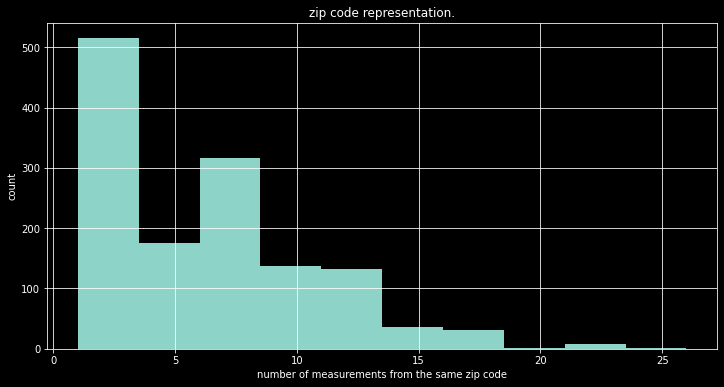

In [90]:
dfca4[col].value_counts().hist(figsize = (12,6))
plt.xlabel("number of measurements from the same zip code")
plt.ylabel("count")
plt.title("zip code representation.");

These are zip codes. There are definitely multiple measurements per zip code --- only 1355 unique values. There is one for each region, but at least one is surely wrong... there is a 32. Is this is something like 00032?

In [68]:
dfca4.loc[dfca4[col] < 10000]

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4544,6083001800,1050,Santa Barbara,32,Unincorporated Santa Barbara County area,-119.717740,34.777648,22.281902,42.713061,40-45%,...,86.899445,38.5,66.871859,9.3,83.224883,10.6,16.311787,39.005295,4.046117,33.862834
5057,6093001200,1261,Siskiyou,35,Unincorporated Siskiyou County area,-121.826057,41.411603,19.513579,36.245587,35-40%,...,NaN,36.0,63.241206,13.7,95.288912,10.9,17.934094,62.053356,6.436950,68.772063
5143,6033000100,3376,Lake,48,Unincorporated Lake County area,-122.909601,39.335491,18.998409,35.161372,35-40%,...,13.303559,38.5,66.871859,13.1,94.521083,16.7,47.617237,48.453698,5.026223,48.020676
5833,6105000400,894,Trinity,39,Unincorporated Trinity County area,-123.210947,40.069602,15.397582,26.462431,25-30%,...,12.275003,60.3,91.846734,NaN,NaN,37.5,97.629911,55.341376,5.740699,58.295512
6343,6109004200,3487,Tuolumne,40,Unincorporated Tuolumne County area,-119.640723,37.949499,12.828329,20.032779,20-25%,...,0.000000,29.0,52.261307,4.6,39.211348,9.7,12.788340,40.278108,4.178149,35.816944
6579,6017030603,3668,El Dorado,51,Unincorporated El Dorado County area,-120.422095,38.882147,11.697855,17.057489,15-20%,...,0.000000,26.9,48.442211,5.3,48.256117,17.9,53.624842,33.353853,3.459879,24.873928
8025,6083980100,10,Santa Barbara,57,Unincorporated Santa Barbara County area,-120.048221,33.948186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8034,6111980000,118,Ventura,61,Unincorporated Ventura County area,-119.503588,33.255655,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8 entries with goofball zips.

These are all "unincorporated" areas. It looks like these are common:

[LACounty.gov Unincorporated Areas](https://lacounty.gov/government/about-la-county/unincorporated-areas/)

[PolicyLink California Unincorporated: Mapping Disadvantaged Communities in the San Joaquin Valley(PDF report)](https://www.policylink.org/sites/default/files/CA%20UNINCORPORATED_FINAL.pdf)

[ZocaloPublicSquare](https://www.zocalopublicsquare.org/2020/11/10/california-unincorporated-communities-covid19-pandemic/ideas/connecting-california/)

## Q:
    - are these unincorporated "zips" real values that are used by the state? Do they mean anything?
    - How many times are certain zip codes represented?
    - Are there other "unincorporated areas"?
    

## 4    Approximate Location     

In [91]:
col = 'Approximate Location'
dfca4[col].describe()

count            8035
unique            785
top       Los Angeles
freq              996
Name: Approximate Location, dtype: object

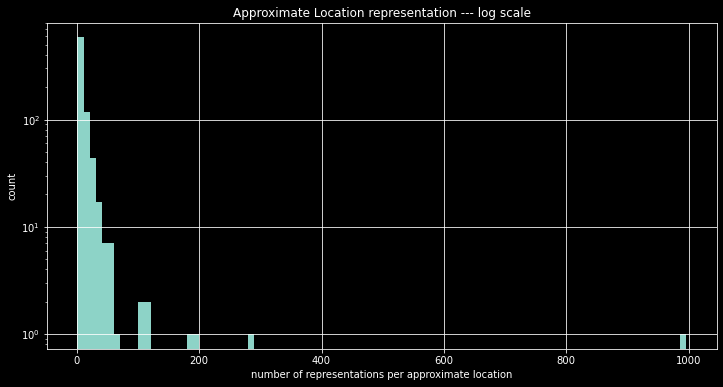

In [100]:
dfca4[col].value_counts().hist(bins = 100, log = True, figsize = (12,6))
plt.xlabel("number of representations per approximate location")
plt.title("Approximate Location representation --- log scale");
plt.ylabel('count');

A lot from LA again. That's the lone 900+. No NaNs. My guess is that this is basically a "city" stand-in, which accounts for all the places that aren't really cities.

## Q:
    - 

## 5 Latitude and 6 Longitude
There shouldn't be too many surprises here. Check for nans and goofballs. Perhaps an opportunity to practice with [matplotlib](https://matplotlib.org/basemap/users/examples.html).

Text(0.5, 1.0, 'data gathering pts')

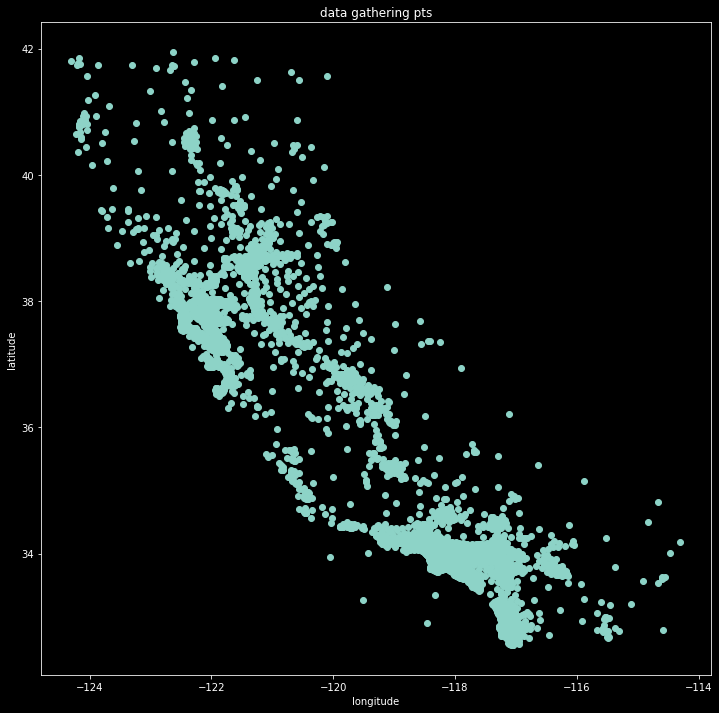

In [74]:
lat = dfca4['Latitude']
lon = dfca4['Longitude']
#plot these bad boys
plt.figure(figsize = (12,12))
plt.scatter(lon, lat)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('data gathering pts')

Hey! That's California. It even looks like an elevation map, with measurements largely avoiding mountainous areas.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,
            resolution ='l',area_thresh=1000.)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## 7   CES 4.0 Score  

In [102]:
col = "CES 4.0 Score"
dfca4[col].describe()

count    7932.000000
mean       28.324179
std        16.512069
min         1.033954
25%        14.786524
50%        25.553719
75%        40.057396
max        93.183570
Name: CES 4.0 Score, dtype: float64

A few NaNs. Find out what this value means.

[Column list](#Column-list)